In [3]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sklearn.metrics import auc

plt.style.use('seaborn-whitegrid')

In [4]:
methods = ['FastICA','PCA','CCA','ILRMA']
states = ['deep-anesthetic','low-anesthetic','recovery','rest']
components = ['','_highpass','_0_delta_theta','_1_alpha','_2_low_beta','_3_high_beta','_4_low_gamma','_5_middle_gamma','_6_high_gamma']

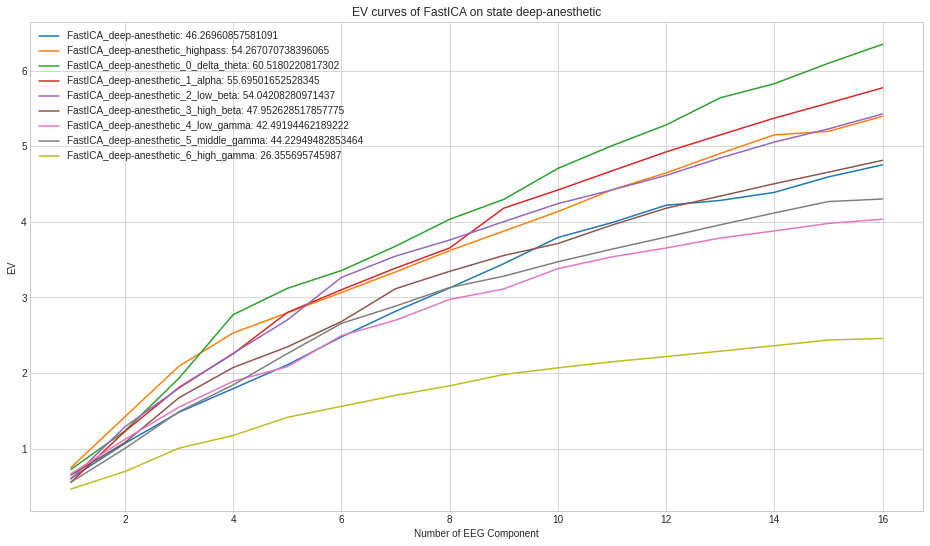

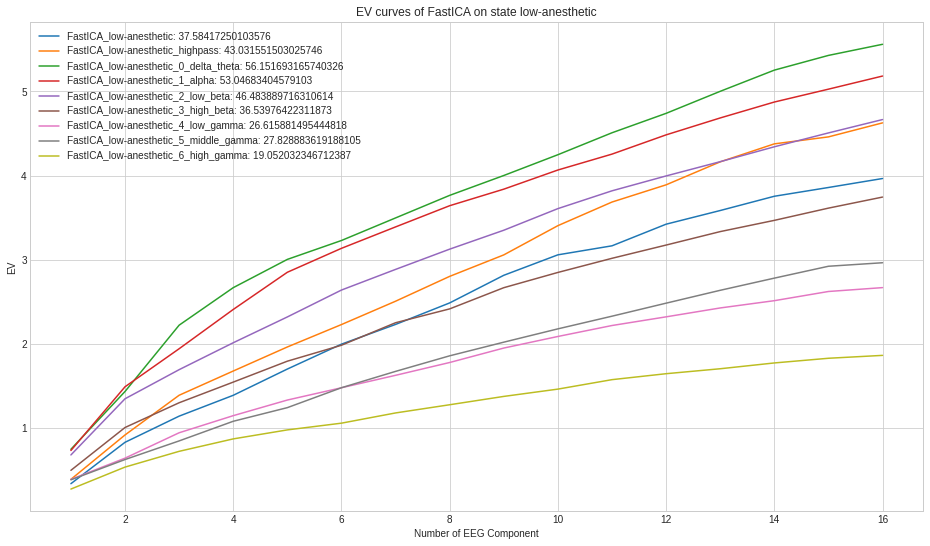

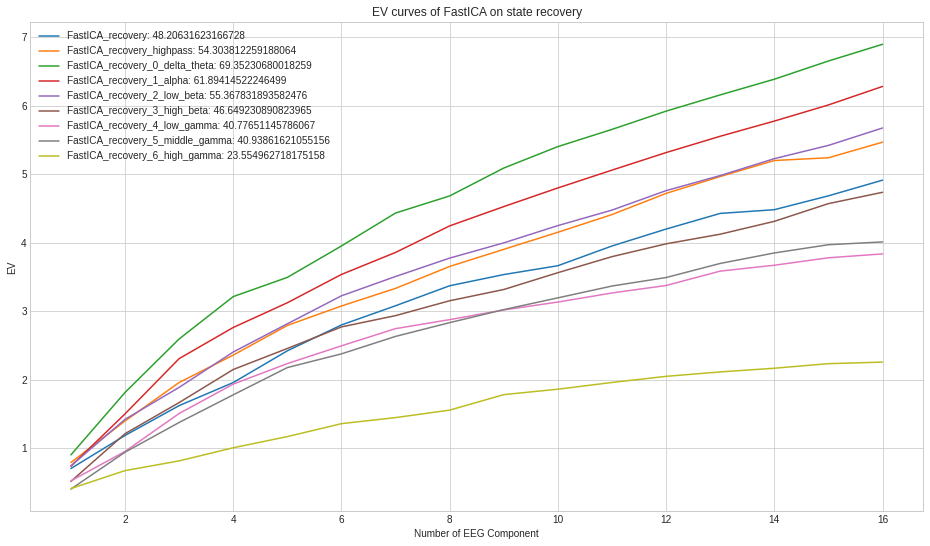

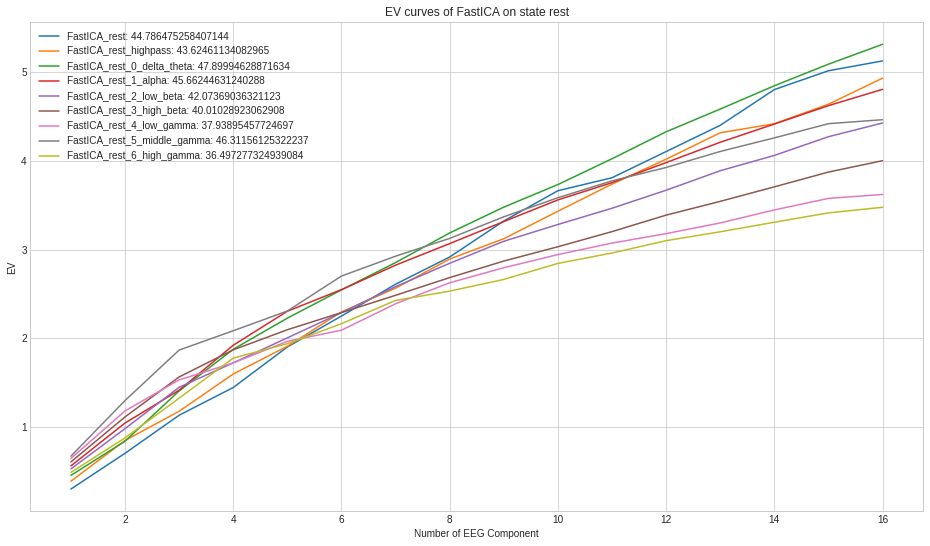

In [53]:
# Let's look at EVs of all method 
cur_state = None
fig, ax = None, None
for state,method,component in product(states,methods,components):
    if(cur_state != state): 
        cur_state = state
        fig, ax = plt.subplots(1, figsize=(16,9))

    try:
        EVs = scipy.io.loadmat(f'BSS/{method}_{state}{component}.mat')['EVs'][0]
    except :
        print(sys.exc_info()[0])

    ax.set_title(f'EV curves of FastICA on state {state}')
    ax.set_xlabel('Number of EEG Component')
    ax.set_ylabel('EV')
    x = range(1,17)
    y = [sum(EV[0]) for EV in EVs ]
    area = auc(x,y)
    ax.plot(x,y, label=f"{method}_{state}{component}: {area}")
    ax.legend()
    # break
plt.show()

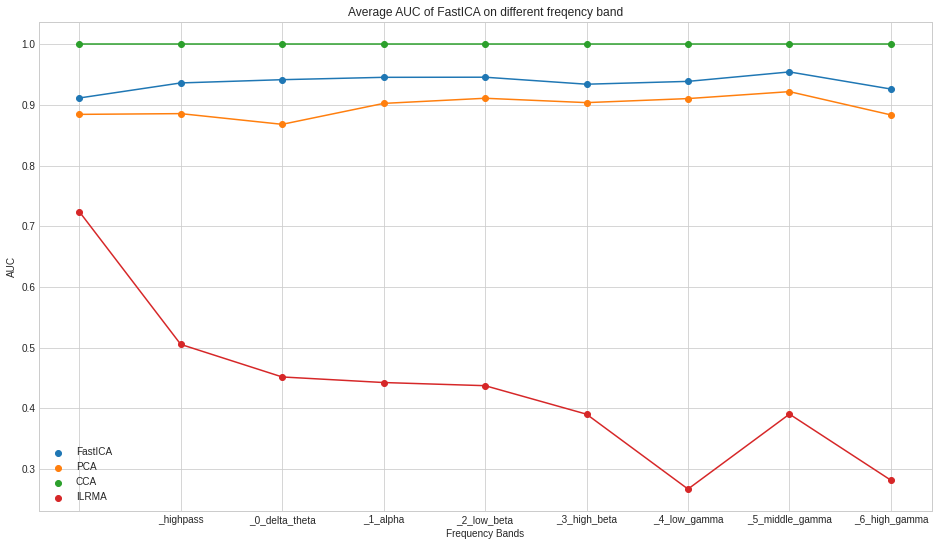

In [17]:
# Let's look at EVs of all method 
fig, ax = plt.subplots(1, figsize=(16,9))
baselines = []
for component in components:
    total = 0
    for state in states:
        try:
            EVs = scipy.io.loadmat(f'BSS/CCA_{state}{component}.mat')['EVs'][0]
        except :
            print(f'BSS/CCA_{state}{component}.mat not found')
        area = auc(range(1,17),np.array([sum(EV[0]) for EV in EVs ]))
        total = total + area
    baselines.append(total/len(states))

for method in methods :
    y = []
    for component in components:
        total = 0
        for state in states:
            try:
                EVs = scipy.io.loadmat(f'BSS/{method}_{state}{component}.mat')['EVs'][0]
            except :
                print(f'BSS/{method}_{state}{component}.mat not found')
            area = auc(range(1,17),[sum(EV[0]) for EV in EVs ])
            total = total + area
        y.append(total/len(states))
    ax.scatter(components,np.array(y) / np.array(baselines) , label=f"{method}")
    ax.plot(components,np.array(y) / np.array(baselines))
    

ax.set_title(f'Average AUC of FastICA on different freqency band')
ax.set_xlabel('Frequency Bands')
ax.set_ylabel('AUC')
ax.legend()
plt.show()
    # break